In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel
from ast import literal_eval
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity


In [2]:
from surprise import SVD, Reader

In [3]:
from surprise import Dataset

In [4]:
from surprise.model_selection import cross_validate

In [5]:
print(SVD)

<class 'surprise.prediction_algorithms.matrix_factorization.SVD'>


In [6]:
#large df1
#df1=pd.read_csv('/Users/vaidehikarve/git_movie_recommender_project/movie-recommender/csv_db/movies_metadata.csv', low_memory = False)

In [7]:
#large df2
#df2=pd.read_csv('/Users/vaidehikarve/git_movie_recommender_project/movie-recommender/csv_db/keywords.csv')

In [8]:
#large df3
#df3=pd.read_csv('/Users/vaidehikarve/git_movie_recommender_project/movie-recommender/csv_db/credits.csv')

In [9]:
df1=pd.read_csv('/Users/vaidehikarve/git_movie_recommender_project/movie-recommender/csv_db/tmdb_5000_credits.csv')

In [10]:
df2 = pd.read_csv('/Users/vaidehikarve/git_movie_recommender_project/movie-recommender/csv_db/tmdb_5000_movies.csv')

In [11]:
df1

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."
...,...,...,...,...
4798,9367,El Mariachi,"[{""cast_id"": 1, ""character"": ""El Mariachi"", ""c...","[{""credit_id"": ""52fe44eec3a36847f80b280b"", ""de..."
4799,72766,Newlyweds,"[{""cast_id"": 1, ""character"": ""Buzzy"", ""credit_...","[{""credit_id"": ""52fe487dc3a368484e0fb013"", ""de..."
4800,231617,"Signed, Sealed, Delivered","[{""cast_id"": 8, ""character"": ""Oliver O\u2019To...","[{""credit_id"": ""52fe4df3c3a36847f8275ecf"", ""de..."
4801,126186,Shanghai Calling,"[{""cast_id"": 3, ""character"": ""Sam"", ""credit_id...","[{""credit_id"": ""52fe4ad9c3a368484e16a36b"", ""de..."


In [12]:
df2

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4798,220000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",NaN,9367,"[{""id"": 5616, ""name"": ""united states\u2013mexi...",es,El Mariachi,El Mariachi just wants to play his guitar and ...,14.269792,"[{""name"": ""Columbia Pictures"", ""id"": 5}]","[{""iso_3166_1"": ""MX"", ""name"": ""Mexico""}, {""iso...",1992-09-04,2040920,81.0,"[{""iso_639_1"": ""es"", ""name"": ""Espa\u00f1ol""}]",Released,"He didn't come looking for trouble, but troubl...",El Mariachi,6.6,238
4799,9000,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 10749, ""...",NaN,72766,[],en,Newlyweds,A newlywed couple's honeymoon is upended by th...,0.642552,[],[],2011-12-26,0,85.0,[],Released,A newlywed couple's honeymoon is upended by th...,Newlyweds,5.9,5
4800,0,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...",http://www.hallmarkchannel.com/signedsealeddel...,231617,"[{""id"": 248, ""name"": ""date""}, {""id"": 699, ""nam...",en,"Signed, Sealed, Delivered","""Signed, Sealed, Delivered"" introduces a dedic...",1.444476,"[{""name"": ""Front Street Pictures"", ""

In [13]:
print(df1.dtypes['movie_id'])
print(df2.dtypes['id'])

int64
int64


In [14]:
#df1['movie_id']=df1['movie_id'].astype(int)
print(df1.dtypes['movie_id'])

int64


In [15]:
df1.rename(columns = {'movie_id': 'id'}, inplace = True)

In [16]:
df1

,id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."
...,...,...,...,...
4798,9367,El Mariachi,"[{""cast_id"": 1, ""character"": ""El Mariachi"", ""c...","[{""credit_id"": ""52fe44eec3a36847f80b280b"", ""de..."
4799,72766,Newlyweds,"[{""cast_id"": 1, ""character"": ""Buzzy"", ""credit_...","[{""credit_id"": ""52fe487dc3a368484e0fb013"", ""de..."
4800,231617,"Signed, Sealed, Delivered","[{""cast_id"": 8, ""character"": ""Oliver O\u2019To...","[{""credit_id"": ""52fe4df3c3a36847f8275ecf"", ""de..."
4801,126186,Shanghai Calling,"[{""cast_id"": 3, ""character"": ""Sam"", ""credit_id...","[{""credit_id"": ""52fe4ad9c3a368484e16a36b"", ""de..."


In [17]:
print(type(df1))

<class 'pandas.core.frame.DataFrame'>


In [18]:
movies_df= df2.merge(df1,on='id')

In [19]:
#movies_df = movies_df.merge(df3, on = 'id')

In [20]:
movies_df.head(5)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,title_x,vote_average,vote_count,title_y,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [21]:
movies_df.columns

Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title_x', 'vote_average',
       'vote_count', 'title_y', 'cast', 'crew'],
      dtype='object')

In [22]:
movies_df.shape

(4803, 23)

In [23]:
mean_vote = movies_df['vote_average'].mean()
mean_vote

6.092171559442016

In [24]:
min_votes = movies_df['vote_count'].quantile(0.9)
min_votes

1838.4000000000015

In [25]:
qualified_movies = movies_df.copy().loc[movies_df['vote_count'] >= min_votes]
print(qualified_movies.shape)

(481, 23)


In [26]:
def weighted_rating(x, min_votes = min_votes, mean_vote = mean_vote):
    num_votes = x['vote_count']
    avg_rating = x['vote_average']
    # Calculation based on the IMDB formula
    return (num_votes/(num_votes + min_votes) * avg_rating) + (min_votes/(min_votes + num_votes) * mean_vote)

In [27]:
# Define a new feature 'score' and calculate its value with `weighted_rating()
qualified_movies['score'] = qualified_movies.apply(weighted_rating, axis=1)

In [28]:
#Sort movies based on score calculated above
qualified_movies = qualified_movies.sort_values('score', ascending = False)

In [31]:
#Print the top 10 movies
qualified_movies[['title_x', 'vote_count', 'vote_average', 'score']].head(10)

,title_x,vote_count,vote_average,score
1881,The Shawshank Redemption,8205,8.5,8.059258
662,Fight Club,9413,8.3,7.939256
65,The Dark Knight,12002,8.2,7.920020
3232,Pulp Fiction,8428,8.3,7.904645
96,Inception,13752,8.1,7.863239
3337,The Godfather,5893,8.4,7.851236
95,Interstellar,10867,8.1,7.809479
809,Forrest Gump,7927,8.2,7.803188
329,The Lord of the Rings: The Return of the King,8064,8.1,7.727243
1990,The Empire Strikes Back,5879,8.2,7.697884


Text(0.5, 1.0, 'Popular Movies')

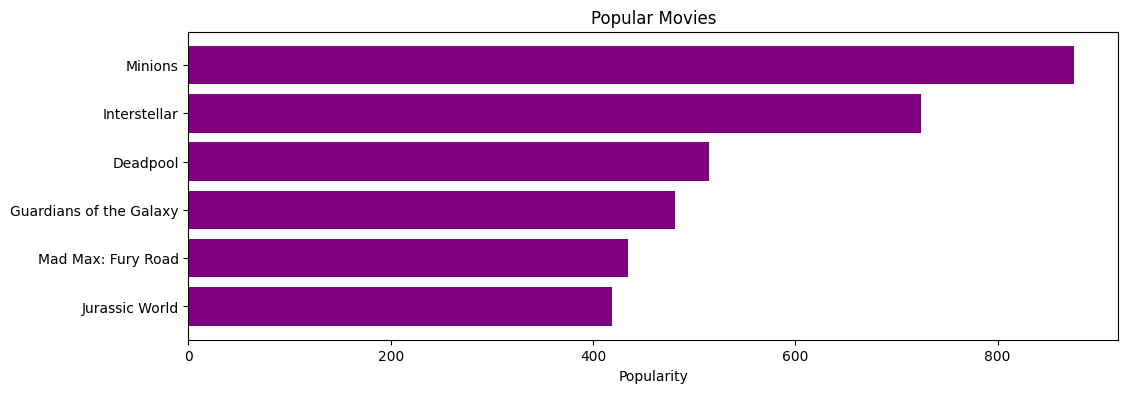

In [32]:
pop= movies_df.sort_values('popularity', ascending=False)
plt.figure(figsize=(12,4))

plt.barh(pop['title_x'].head(6),pop['popularity'].head(6), align='center', color='purple')
plt.gca().invert_yaxis()
plt.xlabel("Popularity")
plt.title("Popular Movies")

In [33]:
movies_df['overview'].head(5)
#movies_df['popularity']

0    In the 22nd century, a paraplegic Marine is di...
1    Captain Barbossa, long believed to be dead, ha...
2    A cryptic message from Bond’s past sends him o...
3    Following the death of District Attorney Harve...
4    John Carter is a war-weary, former military ca...
Name: overview, dtype: object

In [34]:
#Starting Content-BAsed Filtering
#Import TfIdfVectorizer from scikit-learn

In [35]:
#Define a TF-IDF Vectorizer Object. Remove all english stop words such as 'the', 'a'
tfidf = TfidfVectorizer(stop_words='english')

In [36]:
#Replace NaN with an empty string
movies_df['overview'] = movies_df['overview'].fillna('')

In [37]:
movies_df['overview']

0       In the 22nd century, a paraplegic Marine is di...
1       Captain Barbossa, long believed to be dead, ha...
2       A cryptic message from Bond’s past sends him o...
3       Following the death of District Attorney Harve...
4       John Carter is a war-weary, former military ca...
                              ...                        
4798    El Mariachi just wants to play his guitar and ...
4799    A newlywed couple's honeymoon is upended by th...
4800    "Signed, Sealed, Delivered" introduces a dedic...
4801    When ambitious New York attorney Sam is sent t...
4802    Ever since the second grade when he first saw ...
Name: overview, Length: 4803, dtype: object

In [38]:
#Construct the required TF-IDF matrix by fitting and transforming the data
tfidf_matrix = tfidf.fit_transform(movies_df['overview'])

In [39]:
#Output shape of tfidf_matrix
tfidf_matrix.shape

(4803, 20978)

In [40]:
#Calculate cosine similarity matrix
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

In [41]:
#Construct a reverse map of indices and movie titles
indices = pd.Series(movies_df.index, index = movies_df['title_x']).drop_duplicates()
indices

title_x
Avatar                                         0
Pirates of the Caribbean: At World's End       1
Spectre                                        2
The Dark Knight Rises                          3
John Carter                                    4
                                            ... 
El Mariachi                                 4798
Newlyweds                                   4799
Signed, Sealed, Delivered                   4800
Shanghai Calling                            4801
My Date with Drew                           4802
Length: 4803, dtype: int64

In [42]:
'''
Get the index of the movie given its title.
Get the list of cosine similarity scores for that particular movie with all movies. Convert it into a list of tuples where the first element is its position and the second is the similarity score.
Sort the aforementioned list of tuples based on the similarity scores; that is, the second element.
Get the top 10 elements of this list. Ignore the first element as it refers to self (the movie most similar to a particular movie is the movie itself).
Return the titles corresponding to the indices of the top elements.
'''
def get_recs(title, cosine_sim = cosine_sim):

    #get index of movie given title
    idx = indices[title]

    #get pairs of cosine similarity scores for movie with all movies
    similarity_scores = list(enumerate(cosine_sim[idx]))

    #sort tuples based on sim scores
    similarity_scores = sorted(similarity_scores, key = lambda x: x[1], reverse = True)

    #get top 10
    similarity_scores = similarity_scores[1:11]

    #get indices of top ten
    top_ten_indices = [x[0] for x in similarity_scores]

    #return titles
    return movies_df['title_x'].iloc[top_ten_indices]

In [43]:
type(cosine_sim)

numpy.ndarray

In [44]:
movies_df[movies_df['title_x'].isin(['The Dark Knight Rises'])]

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,title_x,vote_average,vote_count,title_y,cast,crew
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.31295,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."


In [46]:
get_recs('The Dark Knight Rises')

65                              The Dark Knight
299                              Batman Forever
428                              Batman Returns
1359                                     Batman
3854    Batman: The Dark Knight Returns, Part 2
119                               Batman Begins
2507                                  Slow Burn
9            Batman v Superman: Dawn of Justice
1181                                        JFK
210                              Batman & Robin
Name: title_x, dtype: object

In [47]:
movies_df.columns

Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title_x', 'vote_average',
       'vote_count', 'title_y', 'cast', 'crew'],
      dtype='object')

In [48]:
get_recs('Snowpiercer')

4350        An Inconvenient Truth
1643              Howard the Duck
4710    Antarctic Edge: 70° South
4427                       Charly
3840                        Train
2410                    Good Boy!
2768                    21 & Over
16                   The Avengers
1704                The Big Short
3330                     The Wave
Name: title_x, dtype: object

In [49]:
get_recs('Black Swan')

898     The Twilight Saga: New Moon
1337                       Twilight
3338                     Flashdance
2374              Mao's Last Dancer
2350                   Center Stage
3587                       Addicted
3666             Dying of the Light
3814                  Desert Dancer
3112        Blood Done Sign My Name
1880                    Dance Flick
Name: title_x, dtype: object

In [50]:
#df3=pd.read_csv('/Users/vaidehikarve/git_movie_recommender_project/movie-recommender/csv_db/credits.csv')

In [51]:
#movies_df = movies_df.merge(df3, on = 'id')

In [52]:
movies_df

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,title_x,vote_average,vote_count,title_y,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4798,220000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",NaN,9367,"[{""id"": 5616, ""name"": ""united states\u2013mexi...",es,El Mariachi,El Mariachi just wants to play his guitar and ...,14.269792,"[{""name"": ""Columbia Pictures"", ""id"": 5}]",...,81.0,"[{""iso_639_1"": ""es"", ""name"": ""Espa\u00f1ol""}]",Released,"He didn't come looking for trouble, but troubl...",El Mariachi,6.6,238,El Mariachi,"[{""cast_id"": 1, ""character"": ""El Mariachi"", ""c...","[{""credit_id"": ""52fe44eec3a36847f80b280b"", ""de..."
4799,9000,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 10749, ""...",NaN,72766,[],en,Newlyweds,A newlywed couple's honeymoon is upended by th...,0.642552,[],...,85.0,[],Released,A newlywed couple's honeymoon is upended by th...,Newlyweds,5.9,5,Newlyweds,"[{

In [53]:
features = ['cast', 'crew', 'keywords', 'genres']
for feature in features:
    movies_df[feature] = movies_df[feature].apply(literal_eval)

In [54]:
movies_df['cast'].iloc[25]

[{'cast_id': 20,
  'character': 'Rose DeWitt Bukater',
  'credit_id': '52fe425ac3a36847f80179cb',
  'gender': 1,
  'id': 204,
  'name': 'Kate Winslet',
  'order': 0},
 {'cast_id': 21,
  'character': 'Jack Dawson',
  'credit_id': '52fe425ac3a36847f80179cf',
  'gender': 2,
  'id': 6193,
  'name': 'Leonardo DiCaprio',
  'order': 1},
 {'cast_id': 22,
  'character': 'Ruth Dewitt Bukater',
  'credit_id': '52fe425ac3a36847f80179d3',
  'gender': 1,
  'id': 3713,
  'name': 'Frances Fisher',
  'order': 2},
 {'cast_id': 23,
  'character': "Caledon 'Cal' Hockley",
  'credit_id': '52fe425ac3a36847f80179d7',
  'gender': 2,
  'id': 1954,
  'name': 'Billy Zane',
  'order': 3},
 {'cast_id': 24,
  'character': 'Molly Brown',
  'credit_id': '52fe425ac3a36847f80179db',
  'gender': 1,
  'id': 8534,
  'name': 'Kathy Bates',
  'order': 4},
 {'cast_id': 25,
  'character': 'Old Rose',
  'credit_id': '52fe425ac3a36847f80179df',
  'gender': 1,
  'id': 8535,
  'name': 'Gloria Stuart',
  'order': 5},
 {'cast_id': 

In [55]:
def get_director(x):
    for i in x:
        if i['job'] == 'Director':
            return i['name']
        else:
            return np.nan

In [56]:
# Returns the list top 3 elements or entire list; whichever is more.
def get_list(x):
    if isinstance(x, list):
        names = [i['name'] for i in x]

        if(len(names) > 3):
            names = names[:3]
        return names
    return []

In [57]:
# Define new director, cast, genres and keywords features that are in a suitable form.
movies_df['director'] = movies_df['crew'].apply(get_director)

features = ['cast', 'keywords', 'genres']
for feature in features:
    movies_df[feature] = movies_df[feature].apply(get_list)

In [58]:
movies_df[['title_x', 'cast', 'director', 'keywords', 'genres']].head(3)

,title_x,cast,director,keywords,genres
0,Avatar,"[Sam Worthington, Zoe Saldana, Sigourney Weaver]",NaN,"[culture clash, future, space war]","[Action, Adventure, Fantasy]"
1,Pirates of the Caribbean: At World's End,"[Johnny Depp, Orlando Bloom, Keira Knightley]",NaN,"[ocean, drug abuse, exotic island]","[Adventure, Fantasy, Action]"
2,Spectre,"[Daniel Craig, Christoph Waltz, Léa Seydoux]",NaN,"[spy, based on novel, secret agent]","[Action, Adventure, Crime]"


In [59]:
movies_df[['title_x', 'cast', 'director', 'keywords', 'genres']].iloc[[7]]

,title_x,cast,director,keywords,genres
7,Avengers: Age of Ultron,"[Robert Downey Jr., Chris Hemsworth, Mark Ruff...",NaN,"[marvel comic, sequel, superhero]","[Action, Adventure, Science Fiction]"


In [60]:
indices.loc['Avengers: Age of Ultron']

7

In [61]:
# Function to convert all strings to lower case and strip names of spaces
def clean_data(x):
    if isinstance(x, list):
        return [str.lower(i.replace(" ", "")) for i in x]
    else:
        if isinstance(x, str):
            return str.lower(x.replace(" ", ""))
        else:
            return ''

In [62]:
features = ['cast', 'keywords', 'director', 'genres', 'production_companies']
for feature in features:
    movies_df[feature] = movies_df[feature].apply(clean_data)

In [63]:
def create_soup(x):
    return ''.join(x['keywords']) + ' ' + ''.join(x['cast']) + ' ' + ''.join(x['director']) + ' ' + ''.join(x['genres']) + ' ' + ''.join(x['production_companies'])

In [64]:
movies_df['soup'] = movies_df.apply(create_soup, axis = 1)

In [65]:
del cosine_sim

In [66]:
count = CountVectorizer(stop_words='english')

In [67]:
count_matrix = count.fit_transform(movies_df['soup'])

In [68]:
cosine_sim2 = cosine_similarity(count_matrix, count_matrix)

In [69]:
movies_df

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,status,tagline,title_x,vote_average,vote_count,title_y,cast,crew,director,soup
0,237000000,"[action, adventure, fantasy]",http://www.avatarmovie.com/,19995,"[cultureclash, future, spacewar]",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"":""ingeniousfilmpartners"",""id"":289},{""n...",...,Released,Enter the World of Pandora.,Avatar,7.2,11800,Avatar,"[samworthington, zoesaldana, sigourneyweaver]","[{'credit_id': '52fe48009251416c750aca23', 'de...",,cultureclashfuturespacewar samworthingtonzoesa...
1,300000000,"[adventure, fantasy, action]",http://disney.go.com/disneypictures/pirates/,285,"[ocean, drugabuse, exoticisland]",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"":""waltdisneypictures"",""id"":2},{""name"":...",...,Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Pirates of the Caribbean: At World's End,"[johnnydepp, orlandobloom, keiraknightley]","[{'credit_id': '52fe4232c3a36847f800b579', 'de...",,oceandrugabuseexoticisland johnnydepporlandobl...
2,245000000,"[action, adventure, crime]",http://www.sonypictures.com/movies/spectre/,206647,"[spy, basedonnovel, secretagent]",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"":""columbiapictures"",""id"":5},{""name"":""d...",...,Released,A Plan No One Escapes,Spectre,6.3,4466,Spectre,"[danielcraig, christophwaltz, léaseydoux]","[{'credit_id': '54805967c3a36829b5002c41', 'de...",,spybasedonnovelsecretagent danielcraigchristop...
3,250000000,"[action, crime, drama]",http://www.thedarkknightrises.com/,49026,"[dccomics, crimefighter, terrorist]",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"":""legendarypictures"",""id"":923},{""name""...",...,Released,The Legend Ends,The Dark Knight Rises,7.6,9106,The Dark Knight Rises,"[christianbale, michaelcaine, garyoldman]","[{'credit_id': '52fe4781c3a36847f81398c3', 'de...",,dccomicscrimefighterterrorist christianbalemic...
4,260000000,"[action, adventure, sciencefiction]",http://movies.disney.com/john-carter,49529,"[basedonnovel, mars, medallion]",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"":""waltdisneypictures"",""id"":2}]",...,Released,"Lost in our world, found in another.",John Carter,6.1,2124,John Carter,"[taylorkitsch, lynncollins, samanthamorton]","[{'credit_id': '52fe479ac3a36847f813eaa3', 'de...",,basedonnovelmarsmedallion taylorkitschlynncoll...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4798,220000,"[action, crime, thriller]",NaN,9367,"[unitedstates–mexicobarrier, legs, arms]",es,El Mariachi,El Mariachi just wants to play his guitar and ...,14.269792,"[{""name"":""columbiapictures"",""id"":5}]",...,Released,"He didn't come looking for trouble, but troubl...",El Mariachi,6.6,238,El Mariachi,"[carlosgallardo, jaimedehoyos, petermarquardt]","[{'credit_id': '52fe44eec3a36847f80b280b', 'de...",robertrodriguez,unitedstates–mexicobarrierlegsarms carlosgalla...
4799,9000,"[comedy, romance]",NaN,72766,[],en,Newlyweds,A newlywed couple's honeymoon is upended by th...,0.642552,[],...,Released,A newlywed couple's honeymoon is upended by th...,Newlyweds,5.9,5,Newlyweds,"[edwardburns, kerrybishé, marshadietlein]","[{'credit_id': '52fe487dc3a368484e0fb013', 'de...",edwardburns,edwardburnskerrybishémarshadietlein edwardbur...
4800,0,"[comedy, drama, romance]",http://www.hallmarkchannel.com/signedsealeddel...,231617,"[date, loveatfirstsight, narration]",en,"Signed, Sealed, Delivered","""Signed, Sealed, Delivered"" introduces a dedic...",1.444476,"[{""name"":""frontstreetpictures"",""id"":3958},{""na...",...,Released,NaN,"Signed, Sealed, Delivered",7.0,6,"Signed, Sealed, Delivered","[ericmabius, kristi

In [70]:
movies_df = movies_df.reset_index()

In [71]:
movies_df

,index,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,...,status,tagline,title_x,vote_average,vote_count,title_y,cast,crew,director,soup
0,0,237000000,"[action, adventure, fantasy]",http://www.avatarmovie.com/,19995,"[cultureclash, future, spacewar]",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,...,Released,Enter the World of Pandora.,Avatar,7.2,11800,Avatar,"[samworthington, zoesaldana, sigourneyweaver]","[{'credit_id': '52fe48009251416c750aca23', 'de...",,cultureclashfuturespacewar samworthingtonzoesa...
1,1,300000000,"[adventure, fantasy, action]",http://disney.go.com/disneypictures/pirates/,285,"[ocean, drugabuse, exoticisland]",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,...,Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Pirates of the Caribbean: At World's End,"[johnnydepp, orlandobloom, keiraknightley]","[{'credit_id': '52fe4232c3a36847f800b579', 'de...",,oceandrugabuseexoticisland johnnydepporlandobl...
2,2,245000000,"[action, adventure, crime]",http://www.sonypictures.com/movies/spectre/,206647,"[spy, basedonnovel, secretagent]",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,...,Released,A Plan No One Escapes,Spectre,6.3,4466,Spectre,"[danielcraig, christophwaltz, léaseydoux]","[{'credit_id': '54805967c3a36829b5002c41', 'de...",,spybasedonnovelsecretagent danielcraigchristop...
3,3,250000000,"[action, crime, drama]",http://www.thedarkknightrises.com/,49026,"[dccomics, crimefighter, terrorist]",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,...,Released,The Legend Ends,The Dark Knight Rises,7.6,9106,The Dark Knight Rises,"[christianbale, michaelcaine, garyoldman]","[{'credit_id': '52fe4781c3a36847f81398c3', 'de...",,dccomicscrimefighterterrorist christianbalemic...
4,4,260000000,"[action, adventure, sciencefiction]",http://movies.disney.com/john-carter,49529,"[basedonnovel, mars, medallion]",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,...,Released,"Lost in our world, found in another.",John Carter,6.1,2124,John Carter,"[taylorkitsch, lynncollins, samanthamorton]","[{'credit_id': '52fe479ac3a36847f813eaa3', 'de...",,basedonnovelmarsmedallion taylorkitschlynncoll...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4798,4798,220000,"[action, crime, thriller]",NaN,9367,"[unitedstates–mexicobarrier, legs, arms]",es,El Mariachi,El Mariachi just wants to play his guitar and ...,14.269792,...,Released,"He didn't come looking for trouble, but troubl...",El Mariachi,6.6,238,El Mariachi,"[carlosgallardo, jaimedehoyos, petermarquardt]","[{'credit_id': '52fe44eec3a36847f80b280b', 'de...",robertrodriguez,unitedstates–mexicobarrierlegsarms carlosgalla...
4799,4799,9000,"[comedy, romance]",NaN,72766,[],en,Newlyweds,A newlywed couple's honeymoon is upended by th...,0.642552,...,Released,A newlywed couple's honeymoon is upended by th...,Newlyweds,5.9,5,Newlyweds,"[edwardburns, kerrybishé, marshadietlein]","[{'credit_id': '52fe487dc3a368484e0fb013', 'de...",edwardburns,edwardburnskerrybishémarshadietlein edwardbur...
4800,4800,0,"[comedy, drama, romance]",http://www.hallmarkchannel.com/signedsealeddel...,231617,"[date, loveatfirstsight, narration]",en,"Signed, Sealed, Delivered","""Signed, Sealed, Delivered"" introduces a dedic...",1.444476,...,Released,NaN,"Signed, Sealed, Delivered",7.0,6,"Signed, Sealed, Delivered","[ericmabius, kristinbooth, crystallowe]","[{'credit_id': '52fe4df3c3a36847f8275ecf', 'de...",,dateloveatfirstsightnarration ericmabiuskristi...
4801,4801,0,[],http://shanghaicalling.com/,126186,[],en,Shanghai Calling,When ambitious New York attorney Sam is sent t...,0.857008,...,Released,A New Yorker in Shanghai,Shanghai Calling,5.7,7,Shanghai Calling,"[danielhenney, elizacoupe, billpaxton]","[{'cred

In [72]:
indices = pd.Series(movies_df.index, index = movies_df['title_x'])

In [73]:
print(type(cosine_sim2))

<class 'numpy.ndarray'>


In [74]:
get_recs('The Dark Knight Rises', cosine_sim2)

119             Batman Begins
14               Man of Steel
65            The Dark Knight
95               Interstellar
96                  Inception
163                  Watchmen
687                       300
48      Jack the Giant Slayer
253    300: Rise of an Empire
963            Ninja Assassin
Name: title_x, dtype: object

In [75]:
get_recs('Black Swan', cosine_sim2)

2799        Dancer in the Dark
3197            Flame & Citron
33       X-Men: The Last Stand
877                 Black Mass
2417       The Hills Have Eyes
2689        Our Family Wedding
2665                 Manderlay
2856               Just Wright
337     A Good Day to Die Hard
101         X-Men: First Class
Name: title_x, dtype: object

In [75]:
movies_df.index

RangeIndex(start=0, stop=4803, step=1)

In [76]:
movies_df

,index,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,...,status,tagline,title_x,vote_average,vote_count,title_y,cast,crew,director,soup
0,0,237000000,"[action, adventure, fantasy]",http://www.avatarmovie.com/,19995,"[cultureclash, future, spacewar]",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,...,Released,Enter the World of Pandora.,Avatar,7.2,11800,Avatar,"[samworthington, zoesaldana, sigourneyweaver]","[{'credit_id': '52fe48009251416c750aca23', 'de...",,cultureclashfuturespacewar samworthingtonzoesa...
1,1,300000000,"[adventure, fantasy, action]",http://disney.go.com/disneypictures/pirates/,285,"[ocean, drugabuse, exoticisland]",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,...,Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Pirates of the Caribbean: At World's End,"[johnnydepp, orlandobloom, keiraknightley]","[{'credit_id': '52fe4232c3a36847f800b579', 'de...",,oceandrugabuseexoticisland johnnydepporlandobl...
2,2,245000000,"[action, adventure, crime]",http://www.sonypictures.com/movies/spectre/,206647,"[spy, basedonnovel, secretagent]",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,...,Released,A Plan No One Escapes,Spectre,6.3,4466,Spectre,"[danielcraig, christophwaltz, léaseydoux]","[{'credit_id': '54805967c3a36829b5002c41', 'de...",,spybasedonnovelsecretagent danielcraigchristop...
3,3,250000000,"[action, crime, drama]",http://www.thedarkknightrises.com/,49026,"[dccomics, crimefighter, terrorist]",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,...,Released,The Legend Ends,The Dark Knight Rises,7.6,9106,The Dark Knight Rises,"[christianbale, michaelcaine, garyoldman]","[{'credit_id': '52fe4781c3a36847f81398c3', 'de...",,dccomicscrimefighterterrorist christianbalemic...
4,4,260000000,"[action, adventure, sciencefiction]",http://movies.disney.com/john-carter,49529,"[basedonnovel, mars, medallion]",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,...,Released,"Lost in our world, found in another.",John Carter,6.1,2124,John Carter,"[taylorkitsch, lynncollins, samanthamorton]","[{'credit_id': '52fe479ac3a36847f813eaa3', 'de...",,basedonnovelmarsmedallion taylorkitschlynncoll...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4798,4798,220000,"[action, crime, thriller]",NaN,9367,"[unitedstates–mexicobarrier, legs, arms]",es,El Mariachi,El Mariachi just wants to play his guitar and ...,14.269792,...,Released,"He didn't come looking for trouble, but troubl...",El Mariachi,6.6,238,El Mariachi,"[carlosgallardo, jaimedehoyos, petermarquardt]","[{'credit_id': '52fe44eec3a36847f80b280b', 'de...",robertrodriguez,unitedstates–mexicobarrierlegsarms carlosgalla...
4799,4799,9000,"[comedy, romance]",NaN,72766,[],en,Newlyweds,A newlywed couple's honeymoon is upended by th...,0.642552,...,Released,A newlywed couple's honeymoon is upended by th...,Newlyweds,5.9,5,Newlyweds,"[edwardburns, kerrybishé, marshadietlein]","[{'credit_id': '52fe487dc3a368484e0fb013', 'de...",edwardburns,edwardburnskerrybishémarshadietlein edwardbur...
4800,4800,0,"[comedy, drama, romance]",http://www.hallmarkchannel.com/signedsealeddel...,231617,"[date, loveatfirstsight, narration]",en,"Signed, Sealed, Delivered","""Signed, Sealed, Delivered"" introduces a dedic...",1.444476,...,Released,NaN,"Signed, Sealed, Delivered",7.0,6,"Signed, Sealed, Delivered","[ericmabius, kristinbooth, crystallowe]","[{'credit_id': '52fe4df3c3a36847f8275ecf', 'de...",,dateloveatfirstsightnarration ericmabiuskristi...
4801,4801,0,[],http://shanghaicalling.com/,126186,[],en,Shanghai Calling,When ambitious New York attorney Sam is sent t...,0.857008,...,Released,A New Yorker in Shanghai,Shanghai Calling,5.7,7,Shanghai Calling,"[danielhenney, elizacoupe, billpaxton]","[{'cred

In [77]:
movies_df.reset_index()
indices = pd.Series(movies_df.index, index=movies_df['title_x'])

In [78]:
movies_df

,index,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,...,status,tagline,title_x,vote_average,vote_count,title_y,cast,crew,director,soup
0,0,237000000,"[action, adventure, fantasy]",http://www.avatarmovie.com/,19995,"[cultureclash, future, spacewar]",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,...,Released,Enter the World of Pandora.,Avatar,7.2,11800,Avatar,"[samworthington, zoesaldana, sigourneyweaver]","[{'credit_id': '52fe48009251416c750aca23', 'de...",,cultureclashfuturespacewar samworthingtonzoesa...
1,1,300000000,"[adventure, fantasy, action]",http://disney.go.com/disneypictures/pirates/,285,"[ocean, drugabuse, exoticisland]",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,...,Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Pirates of the Caribbean: At World's End,"[johnnydepp, orlandobloom, keiraknightley]","[{'credit_id': '52fe4232c3a36847f800b579', 'de...",,oceandrugabuseexoticisland johnnydepporlandobl...
2,2,245000000,"[action, adventure, crime]",http://www.sonypictures.com/movies/spectre/,206647,"[spy, basedonnovel, secretagent]",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,...,Released,A Plan No One Escapes,Spectre,6.3,4466,Spectre,"[danielcraig, christophwaltz, léaseydoux]","[{'credit_id': '54805967c3a36829b5002c41', 'de...",,spybasedonnovelsecretagent danielcraigchristop...
3,3,250000000,"[action, crime, drama]",http://www.thedarkknightrises.com/,49026,"[dccomics, crimefighter, terrorist]",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,...,Released,The Legend Ends,The Dark Knight Rises,7.6,9106,The Dark Knight Rises,"[christianbale, michaelcaine, garyoldman]","[{'credit_id': '52fe4781c3a36847f81398c3', 'de...",,dccomicscrimefighterterrorist christianbalemic...
4,4,260000000,"[action, adventure, sciencefiction]",http://movies.disney.com/john-carter,49529,"[basedonnovel, mars, medallion]",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,...,Released,"Lost in our world, found in another.",John Carter,6.1,2124,John Carter,"[taylorkitsch, lynncollins, samanthamorton]","[{'credit_id': '52fe479ac3a36847f813eaa3', 'de...",,basedonnovelmarsmedallion taylorkitschlynncoll...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4798,4798,220000,"[action, crime, thriller]",NaN,9367,"[unitedstates–mexicobarrier, legs, arms]",es,El Mariachi,El Mariachi just wants to play his guitar and ...,14.269792,...,Released,"He didn't come looking for trouble, but troubl...",El Mariachi,6.6,238,El Mariachi,"[carlosgallardo, jaimedehoyos, petermarquardt]","[{'credit_id': '52fe44eec3a36847f80b280b', 'de...",robertrodriguez,unitedstates–mexicobarrierlegsarms carlosgalla...
4799,4799,9000,"[comedy, romance]",NaN,72766,[],en,Newlyweds,A newlywed couple's honeymoon is upended by th...,0.642552,...,Released,A newlywed couple's honeymoon is upended by th...,Newlyweds,5.9,5,Newlyweds,"[edwardburns, kerrybishé, marshadietlein]","[{'credit_id': '52fe487dc3a368484e0fb013', 'de...",edwardburns,edwardburnskerrybishémarshadietlein edwardbur...
4800,4800,0,"[comedy, drama, romance]",http://www.hallmarkchannel.com/signedsealeddel...,231617,"[date, loveatfirstsight, narration]",en,"Signed, Sealed, Delivered","""Signed, Sealed, Delivered"" introduces a dedic...",1.444476,...,Released,NaN,"Signed, Sealed, Delivered",7.0,6,"Signed, Sealed, Delivered","[ericmabius, kristinbooth, crystallowe]","[{'credit_id': '52fe4df3c3a36847f8275ecf', 'de...",,dateloveatfirstsightnarration ericmabiuskristi...
4801,4801,0,[],http://shanghaicalling.com/,126186,[],en,Shanghai Calling,When ambitious New York attorney Sam is sent t...,0.857008,...,Released,A New Yorker in Shanghai,Shanghai Calling,5.7,7,Shanghai Calling,"[danielhenney, elizacoupe, billpaxton]","[{'cred

In [79]:
type(cosine_sim2)

numpy.ndarray

In [80]:
get_recs('The Dark Knight', cosine_sim2)

119                          Batman Begins
3                    The Dark Knight Rises
14                            Man of Steel
95                            Interstellar
163                               Watchmen
72                           Suicide Squad
1892                            The Losers
10                        Superman Returns
9       Batman v Superman: Dawn of Justice
744                         The Lego Movie
Name: title_x, dtype: object

In [81]:
movies_df[movies_df['id'] == 331]

,index,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,...,status,tagline,title_x,vote_average,vote_count,title_y,cast,crew,director,soup
334,334,93000000,"[adventure, action, thriller]",NaN,331,"[exoticisland, dna, paleontology]",en,Jurassic Park III,"In need of funds for research, Dr. Alan Grant ...",1.859364,...,Released,"This time, it's not just a walk in the park!",Jurassic Park III,5.7,2077,Jurassic Park III,"[samneill, williamh.macy, téaleoni]","[{'credit_id': '52fe4238c3a36847f800d47f', 'de...",,exoticislanddnapaleontology samneillwilliamh.m...


In [82]:
get_recs('Jurassic Park III', cosine_sim2)

28                           Jurassic World
508           The Lost World: Jurassic Park
675                           Jurassic Park
111                            Transformers
36          Transformers: Age of Extinction
35      Transformers: Revenge of the Fallen
190                The Adventures of Tintin
2805                   The Land Before Time
1187                        Bridge of Spies
533                           Monster House
Name: title_x, dtype: object

In [83]:
movies_df['genres']

0              [action, adventure, fantasy]
1              [adventure, fantasy, action]
2                [action, adventure, crime]
3                    [action, crime, drama]
4       [action, adventure, sciencefiction]
                       ...                 
4798              [action, crime, thriller]
4799                      [comedy, romance]
4800               [comedy, drama, romance]
4801                                     []
4802                          [documentary]
Name: genres, Length: 4803, dtype: object

In [84]:
reader = Reader()
ratings = pd.read_csv('/Users/vaidehikarve/git_movie_recommender_project/movie-recommender/csv_db/ratings_small.csv')
ratings.head()

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


In [85]:
ratings.head(5)

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


In [89]:
movies_df[movies_df['id'] == 424]

,index,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,...,status,tagline,title_x,vote_average,vote_count,title_y,cast,crew,director,soup
1818,1818,22000000,"[drama, history, war]",http://www.schindlerslist.com/,424,"[factory, concentrationcamp, hero]",en,Schindler's List,The true story of how businessman Oskar Schind...,104.469351,...,Released,"Whoever saves one life, saves the world entire.",Schindler's List,8.3,4329,Schindler's List,"[liamneeson, benkingsley, ralphfiennes]","[{'credit_id': '52fe4242c3a36847f8010303', 'de...",,factoryconcentrationcamphero liamneesonbenking...


In [91]:
data = Dataset.load_from_df(ratings[['userId', 'movieId', 'rating']], reader)

In [93]:
from surprise.model_selection import KFold

In [96]:
kf = KFold(n_splits=5)
kf.split(data)

<generator object KFold.split at 0x17b57bcd0>

In [98]:
svd_algo = SVD()

In [99]:
cross_validate(svd_algo, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.8978  0.8915  0.8989  0.8906  0.9055  0.8968  0.0054  
MAE (testset)     0.6922  0.6850  0.6904  0.6858  0.6995  0.6906  0.0052  
Fit time          0.66    0.63    0.62    0.62    0.66    0.64    0.02    
Test time         0.06    0.06    0.12    0.06    0.12    0.08    0.03    


{'test_rmse': array([0.89775637, 0.89147791, 0.89885419, 0.8905961 , 0.9055276 ]),
 'test_mae': array([0.69220519, 0.68498709, 0.69043509, 0.68581729, 0.69948772]),
 'fit_time': (0.660499095916748,
  0.6300816535949707,
  0.6178700923919678,
  0.6151130199432373,
  0.6601979732513428),
 'test_time': (0.06073784828186035,
  0.058602333068847656,
  0.1191258430480957,
  0.05860304832458496,
  0.11946702003479004)}

In [100]:
trainset = data.build_full_trainset()
svd.fit(trainset)

In [101]:
ratings[ratings['userId'] == 1]

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205
5,1,1263,2.0,1260759151
6,1,1287,2.0,1260759187
7,1,1293,2.0,1260759148
8,1,1339,3.5,1260759125
9,1,1343,2.0,1260759131


In [102]:
svd.predict(1, 302, 3)

Prediction(uid=1, iid=302, r_ui=3, est=2.7916595808769906, details={'was_impossible': False})